# Exercise 3

## 1. FitzHugh-Nagumo Model

This system imitates the generation of neuronal action potentials:

$$ \dot{v} = v - \frac{1}{3}v^3 - w + I, \quad \tau\dot{w} = v - a - bw $$

with $ a \in \mathbb{R}, b \in (0, 1), I \geq 0, \tau \gg 1 $. $ v $ mimics the membrane potential and $ w $ an outward current.

**1.1 Write down equations for the nullclines for $a = 0$, $b = 1/2$. Calculate the equilibrium point and determine its properties as a function of the input current I.**

The equations fo rthe nullclines are:

$$w = v - \frac{1}{3}v^3 + I$$
$$v = \frac{1}{2}w$$

Equilibrium points occur where the nullclines intersect. Then we calculate the equilibrium by solving the equations of nullclines equal to zero. We get point $(v^*, 2v^*)$ which satisfies with the equation $I=v^* + \frac{1}{3}{v^*}^3$. Since this equation has and only has one solution, there is only one equilibrium point.


The stability of the equilibrium point can be analyzed by examining the Jacobian matrix of the system at the equilibrium point. The Jacobian matrix $ J $ of the system is:

$$ J = \begin{bmatrix} 1 - {v^*}^2 & -1 \\ \frac{1}{\tau} & -\frac{1}{2\tau} \end{bmatrix} $$

The determinant of the Jacobian matrix is $(1-{v^*}^2)(-\frac{1}{2\tau})+\frac{1}{\tau}=\frac{1}{2\tau}(1+{v^*}^2)>0$.

The trace of the Jacobian matrix is $1 - {v^*}^2 - \frac{1}{2\tau}$.

We take $v_0 = \sqrt{1 - \frac{1}{2\tau}}$.
 
When $ I $ satisfies with $I > v_0 + \frac{1}{3}{v_0}^3$, we get the negative trace which means it is a stable point.

When $ I $ satisfies with $I < v_0 + \frac{1}{3}{v_0}^3$, we get the positive trace which means it is a unstable point.

When $ I $ satisfies with $I = v_0 + \frac{1}{3}{v_0}^3$, we get the zero trace and purely imaginary eigenvalues, which suggest a center-like behavior, typically indicating neutrally stable cycles.

**1.2 Use your code from last exercise sheet to make a phase plane plot (including nullclines) for $I = 0$, $\tau = 10$. Plot into it a trajectory starting from any initial condition except the origin. It’s not necessary to attach the code, just the plot.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

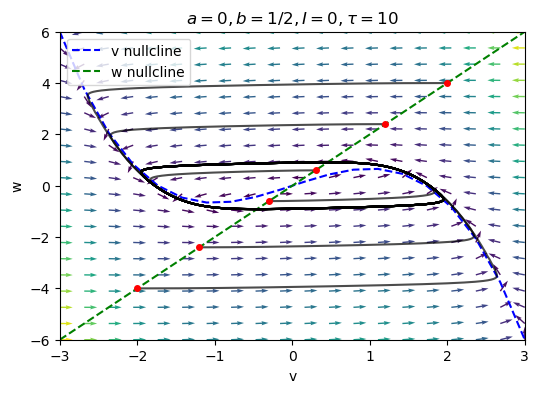

In [147]:
def fitzhugh_nagumo(t, state, a, b, I, tau):
    v, w = state
    dvdt = v - v ** 3 / 3 - w + I
    dwdt = (v - a - b * w) / tau
    return [dvdt, dwdt]

v = np.linspace(-3, 3, 20)
w = np.linspace(-6, 6, 20)
V, W = np.meshgrid(v, w)

t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

a, b = 0, 0.5
I, tau = 0, 10

dv = V - V ** 3 / 3 - W + I
dw = (V - a - b * W) / tau

magnitude = np.sqrt(dv ** 2 + dw ** 2)
dv /= magnitude
dw /= magnitude


# plot
plt.figure(figsize=(6, 4))
plt.quiver(V, W, dv, dw, magnitude)        
plt.plot(v, v - v ** 3 / 3 + I, 'b--', label='v nullcline')
plt.plot(v, 2 * v, 'g--', label='w nullcline')

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.xlabel('v')
plt.ylabel('w')
plt.title(r'$a = 0, b = 1 / 2, I = 0, \tau = 10$')

initial_state_ls = [(-2, -4), (-1.2, -2.4), (-0.3, -0.6), (0.3, 0.6), (1.2, 2.4), (2, 4)]
for initial_state in initial_state_ls:
    trajectory = solve_ivp(fitzhugh_nagumo, t_span, initial_state, args=(a, b, I, tau), t_eval=t_eval)['y']
    dist = 0
    plt.plot(trajectory[0], trajectory[1], 'k-', alpha=0.7)
    plt.plot(initial_state[0], initial_state[1], 'ro', markersize=4)

plt.legend()
plt.show()

**1.3 You should see a limit cycle, which partly follows the $v$ nullcline. Show in a plot that the cycle
vanishes for some $a < 0$, but returns if you increase $I$.**

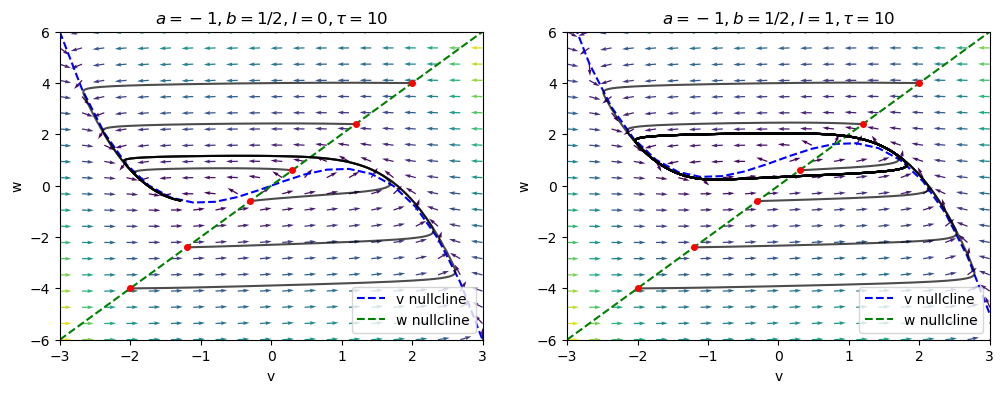

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
v = np.linspace(-3, 3, 20)
w = np.linspace(-6, 6, 20)
V, W = np.meshgrid(v, w)

t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

for i, (a, I) in enumerate([(-1, 0), (-1, 1)]):
    b = 0.5
    tau = 10

    dv = V - V ** 3 / 3 - W + I
    dw = (V - a - b * W) / tau

    magnitude = np.sqrt(dv ** 2 + dw ** 2)
    dv /= magnitude
    dw /= magnitude


    # plot
    axes[i].quiver(V, W, dv, dw, magnitude)        
    axes[i].plot(v, v - v ** 3 / 3 + I, 'b--', label='v nullcline')
    axes[i].plot(v, 2 * v, 'g--', label='w nullcline')

    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-6, 6)
    axes[i].set_xlabel('v')
    axes[i].set_ylabel('w')
    axes[i].set_title(r'$a = {}, b = 1 / 2, I = {}, \tau = 10$'.format(a, I))

    for initial_state in initial_state_ls:
        trajectory = solve_ivp(fitzhugh_nagumo, t_span, initial_state, args=(a, b, I, tau), t_eval=t_eval)['y']
        dist = 0
        axes[i].plot(trajectory[0], trajectory[1], 'k-', alpha=0.7)
        axes[i].plot(initial_state[0], initial_state[1], 'ro', markersize=4)
        
    axes[i].legend()

plt.show()

## 2 More Cycles

A cycle or closed orbit is a trajectory $x(t)$ in a dynamical system such that there are $t_2 > t_1$ with $x(t_2) = x(t_1)$, and for all $t \in (t_1, t_2), x(t) \neq x(t_1)$. A center is an equilibrium point such that all trajectories sufficiently close to it are cycles.
For each of the following cases, decide if the system either has no cycle or at least one (sometimes depending on parameters). Explain.

**2.1 (Easy) Consider the system**
$$
\dot{x} = y, \quad \dot{y} = -2x^3
$$
**Hint: examine the properties of the fixed point, and show that $E(x,y) = x^4 + y^2$ is constant in time (i.e. along every trajectory).**

The fix point is $(0,0)$ and the Jacobian matrix $ J $ is:

$$ J = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} $$

The eigenvalues are zeros, which suggest a center-like behavior, typically indicating neutrally stable cycles.

Compute the time derivative of $E(x, y)$:
$$
\frac{dE}{dt} = \frac{\partial E}{\partial x}\dot{x} + \frac{\partial E}{\partial y}\dot{y} = 4x^3 y + 2y(-2x^3) = 0.
$$
This means $E(x, y)$ is constant along trajectories. The level curves defined by $E(x, y) = k$ for $k > 0$ are closed curves in the phase plane. All trajectories are closed orbits, making the fix point (origin) a center.

**2.2 (Medium) Consider the system:**
$$
\dot{x} = (x^2 + y^2)(ax - y) - y, \quad \dot{y} = (x^2 + y^2)(x + ay) + x
$$
**for $a \in \mathbb{R}$. Hint: transfer the system into polar coordinates.**

By converting to polar coordinates:
$$
x = r\cos\theta, \quad y = r\sin\theta,
$$
we get
$$
r^2 = x^2+ y^2, \quad \tan\theta = \frac{y}{x}.
$$

Take the derivative:
$$
2r\cdot\dot{r} = 2x\cdot\dot{x} + 2y\cdot\dot{y} = 2x (x^2 + y^2)(ax - y) - 2xy + 2y(x^2 + y^2)(x + ay) + 2xy = 2a(x^2+y^2)^2=2ar^4.
$$
$$
\frac{1}{\cos^2\theta}\cdot\dot{\theta} = \frac{x\cdot\dot{y} - y\cdot\dot{x}}{x^2} = \frac{x(x^2 + y^2)(x + ay) + x^2 - y(x^2 + y^2)(ax - y) + y^2}{x^2} = \frac{(x^2+y^2)(x^2+y^2+1)}{x^2} = \frac{r^2(r^2+1)}{r^2\cos^2\theta} = \frac{r^2+1}{\cos^2\theta}.
$$
The system becomes:
$$
\dot{r} = a r^3, \quad \dot{\theta} = r^2 + 1.
$$

- When $a = 0$: $\dot{r} = 0$, so $r$ is constant. The trajectories are circles, making them cycles.
- When $a > 0$: $\dot{r} = a r^3 > 0$, so $r$ increases without bound, and trajectories spiral outward.
- When $a < 0$: $\dot{r} = a r^3 < 0$, so $r$ decreases to zero and trajectories spiral inward toward the origin.

Thus, cycles occur only when $a = 0$.

**2.3 (Hard) Consider the system**
$$
\dot{x} = -x + ay + x^2y, \quad \dot{y} = b - ay - x^2y
$$
**where $a, b > 0$. This is a model of glycolysis, the transformation of sugar (y) to ADP (x), which fuels cells. This is why we only consider $x, y \geq 0$. Hint: Use the Poincaré-Bendixson Theorem. For this, you need to construct a compact connected set $C$, which contains no equilibrium points, and where the flow is directed inwards on the boundary $\partial C$. Then there must be a limit cycle inside. Try to find an area with a pentagon-shaped outline that fulfills these conditions. Use the $x$ and $y$ axes as parts of the boundary. We call $C$ a trapping region. Sketching this system is very helpful.**


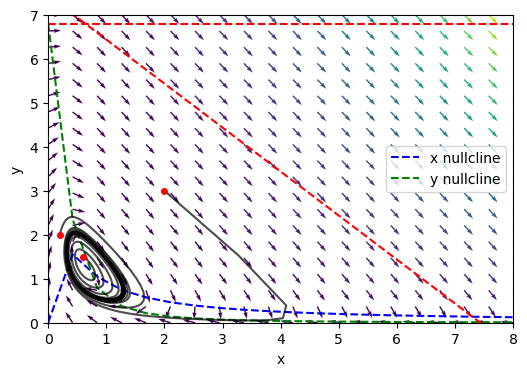

In [96]:
def fitzhugh_nagumo(t, state, a, b):
    x, y = state
    dxdt = - x + a * y + x ** 2 * y
    dydt = b - a * y - x ** 2 * y
    return [dxdt, dydt]

x = np.linspace(0, 8, 20)
y = np.linspace(0, 7, 20)
X, Y = np.meshgrid(x, y)

t_span = [0, 1000]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

a, b = 3/32, np.sqrt(13/32)
U = - X + a * Y + X ** 2 * Y
V = b - a * Y - X ** 2 * Y

magnitude = np.sqrt(U ** 2 + V ** 2)
U /= magnitude
V /= magnitude


# plot
plt.figure(figsize=(6, 4))
plt.quiver(X, Y, U, V, magnitude)        
plt.plot(x, x / (a + x ** 2), 'b--', label='x nullcline')
plt.plot(x, b / (a + x ** 2), 'g--', label='y nullcline')

plt.plot(x, [b / a] * len(x), 'r--')
plt.plot(x, b + b / a - x, 'r--')

plt.xlim(0, 8)
plt.ylim(0, 7)
plt.xlabel('x')
plt.ylabel('y')

initial_state_ls = [(0.6, 1.5), (0.2, 2), (2, 3)]
for initial_state in initial_state_ls:
    trajectory = solve_ivp(fitzhugh_nagumo, t_span, initial_state, args=(a, b), t_eval=t_eval)['y']
    dist = 0
    plt.plot(trajectory[0], trajectory[1], 'k-', alpha=0.7)
    plt.plot(initial_state[0], initial_state[1], 'ro', markersize=4)

plt.legend()
plt.show()

Setting $\dot{x} = \dot{y} = 0$, we get the equilibrium point $(b, \frac{b}{a+b^2})$.

Take the Jacobian Matrix:
$$
J = \begin{bmatrix} 2xy - 1 & a + x^2 \\ - 2xy & - a - x\end{bmatrix} = \begin{bmatrix} \frac{b^2-a}{a+b^2} & a + b^2 \\ - \frac{2b^2}{a+b^2} & - a - b^2\end{bmatrix}.
$$

The determinant of the Jacobian matrix is $a-b^2+2b^2=a+b^2>0$.

The trace of the Jacobian matrix is $\frac{b^2-a}{a+b^2} - (a+b^2)=-\frac{1}{a+b^2}(b^4+(2a-1)b^2+(a^2+a))=-\frac{1}{a+b^2}[(b^2-\frac{1-2a}{2})^2-\frac{1-8a}{4}]$.

If $a>\frac18$, or $|b^2-\frac{1-2a}{2}|>\frac{\sqrt{1-8a}}{2}$ with $a\leq\frac18$, the equilibrium point is stable, which means the system has no cycle.

If $|b^2-\frac{1-2a}{2}|\leq\frac{\sqrt{1-8a}}{2}$ and $a\leq\frac18$, the equilibrium point is unstable.

we can construct a trapping region $C$ between $x$-axis, $y$-axis, $y=\frac{b}{a}$ and $x+y-\frac{b}{a}-b=0$, excepet a neighbourhood $N$ around the equilibrium point.

On the $x$-axis ($y = 0$): $\dot{x} = -x < 0$ (for $x > 0$), so the flow points left, into $C$.

On the $y$-axis ($x = 0$): $\dot{y} = b - a y > 0$ (since $b > 0$ and $a, y \geq 0$), so the flow points upward, into $C$.

On the line $y=\frac{b}{a}$, $\dot{y} = b - (a + x^2)\cdot\frac{b}{a} = - \frac{b}{a}x^2< 0$, so the flow points downward, into $C$.

On the line $x+y-\frac{b}{a}-b=0$ with $x>b$, $\dot{x} + \dot{y} = -x + ay + x^2y + b - ay - x^2y = b - x < 0$, so the flow points goes below the line, into $C$.

On the edge of the neighbourhood $N$, the flow points goes outside, into $C$.


## 3. Hartman-Grobman Theorem

**Given a differential equation system $ \dot{x} = f(x), f \in C^\infty $ with a hyperbolic equilibrium point $ x^\star $, the Hartman-Grobman theorem states that in a neighbourhood $ N $ around $ x^\star $, we can linearize the system around $ x^\star $ and obtain a topologically conjugate flow. By giving a counterexample, show that indeed $ x^\star $ must be hyperbolic for the theorem to hold.**

Consider the following system as a counterexample:

$$
\dot{x} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} x + \epsilon(x),
$$

where $\epsilon(x)$ represents small nonlinear terms.

In this case, the Jacobian matrix $ J = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} $ has purely imaginary eigenvalues $\pm i$, indicating that the equilibrium point is non-hyperbolic. The actual dynamics of the system can exhibit behavior that is not topologically conjugate to its linearized approximation, even in a neighborhood around $ x^\star $.

This counterexample illustrates that the equilibrium point must be hyperbolic for the Hartman-Grobman theorem to hold, as the topological conjugacy between the nonlinear system and its linearized counterpart breaks down for non-hyperbolic points.

## 4. Example Systems

**For each of the following conditions, provide an example of a dynamical system defined in $\mathbb{R}^2$ which fulfills them (with proof that it does). The examples have to be nontrivial, i.e. no derivative can be 0 everywhere. If you think that no such system exists, explain why.**

**4.1. An equilibrium point at $(a, a^2)$ and an equilibrium point at $(b, b^2)$ for $a, b \neq 0$. One of them is stable, the other unstable. No other equilibrium points.**


System:
$$
\dot{x} = -(x - a)(x - b), \quad\dot{y} = -(y - x^2)
$$

Setting $\dot{x} = 0$ yields $x = a$ or $x = b$. Setting $\dot{y} = 0$ yields $y = x^2$. Thus, the equilibrium points are $(a, a^2)$ and $(b, b^2)$. There are no other equilibrium points.

Take the Jacobian Matrix:
$$
J = \begin{bmatrix} -2x + (a + b) & 0 \\ 2x & -1\end{bmatrix}
$$
Thus, the eigenvalues are $\lambda_1 = - 2x + (a + b), \quad \lambda_2 = -1$.

Without loss of generality we take $a > b$. Then for the point $(a, a^2)$, we get $\lambda_1 = b - a < 0$, which means this point is stable. Conversely, for the point $(b, b^2)$, we get $\lambda_1 = a - b > 0$, which means this point is unstable.

**4.2 A linear system with an equilibrium point other than the origin, and no line attractor (a.k.a. non-isolated equilibrium point).**

No such nontrivial linear system exists in $ \mathbb{R}^2 $.

A linear system in the context of dynamical systems is given by $ \dot{d\mathbf{x}} = A\mathbf{x} $, where $ A $ is a constant matrix. Equilibrium points satisfy $ A\mathbf{x} = \mathbf{0} $.

If $ A $ is non-singular, the only solution is $ \mathbf{x} = \mathbf{0} $.

To have an equilibrium point other than the origin, $ A $ must be singular. However, a singular $ A $ implies a nontrivial solution leading to a line attractor.

**4.3 A saddle node, a stable and an unstable node. The system may have more equilibrium points.**

System:
$$
\dot{x} = x(1 - x), \quad\dot{y} = -y(1 + y)
$$

Setting $\dot{x} = \dot{y} = 0$, the equilibrium points are, the equilibrium points are $(0, 0)$, $(1, 0)$, $(0, -1)$, and $(1, -1)$.

Take the Jacobian Matrix:
$$
J = \begin{bmatrix} 1 - 2x & 0 \\ 0 & -1 - 2y\end{bmatrix}
$$

At $(0, 0)$: Eigenvalues $\lambda_1 = 1$, $\lambda_2 = -1$ (saddle point).

At $(1, 0)$: Eigenvalues $\lambda_1 = -1$, $\lambda_2 = -1$ (stable node).

At $(0, -1)$: Eigenvalues $\lambda_1 = 1$, $\lambda_2 = 1$ (unstable node).


**4.4 Infinitely many equilibrium points, but no line attractor.**


*System:*
$$
\dot{x} = \sin(x), \quad\dot{y} = \sin(y)
$$


Setting $\dot{x} = \dot{y} = 0$, we get $\sin(x) = 0$ and $\sin(y) = 0$. The equilibrium points are $(n\pi, m\pi)$, $n\in\mathbb{Z}$, which are infinite and isolated.
